In [ ]:
#Workflow in Job: READ ME
-> Never touch Steps 1, 2, 3, 4, 5, 6 — and all other code blocks as they are fixed.
-> Only edit the “🔄 Daily Prompts Area” with:
-> New prompts
-> AI responses (from Invisible AI model or given file)
-> Reference answers or (correct answers)
-> Run “Run all” in Colab.
-> Logs get saved in Drive automatically.
-> Download locally only if the manager asks.

In [ ]:
#Fetching data from AI through Python Programming demo code-1

from invisible_ai_sdk import invisible_ai_response

api_key = "YOUR_SECRET_API_KEY"



response = invisible_ai_response(
    prompt="Write an article about fastest bike vs car",
    api_key=api_key
)


                                                                              # { NONE of these are gonna  work because without company provided API key you wont be able to get access or call the ai to respond }
#Fetching data from AI through Python Programming demo code-2

from helper_functions import invisible_ai_response

variable1 = "fastest bike in world"
variable2 = "fastest car in world"

response = invisible_ai_response(f"""
Write me an article on which is worthy buying: {variable1} or {variable2} in 100 words.
""")

print(response)







In [8]:
# =====================================
# Invisible AI QA Master Notebook
# =====================================

# Step 1: Setup (Run once per session)
from google.colab import drive, files
import pandas as pd
import datetime
import os
import pytest


# Mount Google Drive
drive.mount('/content/drive')

# Log folder & daily file in Drive
log_folder = '/content/drive/MyDrive/AI_QA_Logs/'
os.makedirs(log_folder, exist_ok=True)

# Helps to Create and download a fresh log per day  (YYYY-MM-DD)                              [ R E M O V E these 2 lines part if you want all OLD and NEW logs in ONE csv FILE  ]
today_str = datetime.datetime.now().strftime("%Y-%m-%d")
file_name = os.path.join(log_folder, f'qa_log_{today_str}.csv')


# =====================================
# 🔄 Daily Prompts Area (EDIT THIS ONLY)
# =====================================
prompts = [
    "What's the capital of France?",
    "Who wrote Macbeth?",
    "What is 9+5?",
    "what is 50-10?",
    "what roams at day?",
    "which singer sung the song Mayores?",
    "who is founder of Nvidia company?",
    "What is the latest apple laptop?",
    "which is the fastest car in world?"
]

# Simulated AI responses (replace later with real model outputs)
ai_responses = [
    "Paris",        #correct
    "Shakespeare",  # correct
    "14"  ,           # Correct
    "40",            # correct
    "Birds",          # correct
    "Becky G", # Wrong
    "Jason Leung",    #correct
    "M4",              #correct
    "Ferrari"          #wrong
]

# Correct reference answers
reference_answers = ["Paris", "Shakespeare", "14","40","Birds","Becky G", "Jason Leung", "M4" , "Bugatti"]

# =====================================
# Step 2: Evaluate & Log
# =====================================
results = []
for prompt, response, reference in zip(prompts, ai_responses, reference_answers):
    category = "Pass" if response == reference else "Fail"
    results.append({
        "prompt": prompt,
        "response": response,
        "reference": reference,
        "category": category,
        "timestamp": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    })

df_new = pd.DataFrame(results)

# Step 3: Append to old logs
if os.path.exists(file_name):
    df_old = pd.read_csv(file_name)
    df = pd.concat([df_old, df_new], ignore_index=True)
else:
    df = df_new

df.to_csv(file_name, index=False)
print(f"✅ QA run logged at '{file_name}'")

# Step 4: Detect Failures
fails = df_new[df_new["category"] == "Fail"]
print("\n❌ Today's Failures:")
print(fails)

# Step 5: Compare with Previous Run
if 'df_old' in locals():
    comparison = df_old.merge(df_new, on="prompt", how="left", suffixes=("_old","_new"))
    print("\n📊 Old vs New Runs:")
    print(comparison)
else:
    print("\n📊 First run — no comparison available.")
# Step 6: Automated QA Tests with PyTest
# =====================================
# Define test cases for PyTest
@pytest.mark.parametrize("prompt,response,reference", zip(prompts, ai_responses, reference_answers))
def test_ai_response(prompt, response, reference):
    """
    QA Test:
    Checks if AI response matches the reference answer.
    Logs failures with timestamp.
    """
    if response != reference:
        print(f"\n❌ FAIL [{datetime.datetime.now()}]")
        print(f"Prompt: {prompt}")
        print(f"Expected: {reference}")
        print(f"Got: {response}")
    assert response == reference

# Run PyTest inside Colab
!pytest -q --disable-warnings


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ QA run logged at '/content/drive/MyDrive/AI_QA_Logs/qa_log_2025-10-07.csv'

❌ Today's Failures:
                               prompt response reference category  \
8  which is the fastest car in world?  Ferrari   Bugatti     Fail   

             timestamp  
8  2025-10-07 19:29:20  

📊 Old vs New Runs:
                                 prompt response_old reference_old  \
0         What's the capital of France?        Paris         Paris   
1                    Who wrote Macbeth?  Shakespeare   Shakespeare   
2                          What is 9+5?           14            14   
3                        what is 50-10?           40            40   
4                    what roams at day?        Birds         Birds   
5   which singer sung the song Mayores?      Becky G       Becky G   
6     who is founder of Nvidia company?  Jason Leung   Jason Leung   
7   

In [ ]:
# Run pytest and save output to a log file for existence [MANDATORY/OPTIONAL]
!pytest -v > pytest_output.log

In [ ]:
# Downloading Pytest Log report [MANDATORY/OPTIONAL]
# Pytest log
files.download('pytest_output.log')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Downloading report log to local computer (just the prompts , responses , references report without pytest ) [MANDATORY]
#  QA master log
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd                                                                   #OPTIONAL.
import os
from glob import glob

# Folder where QA logs are stored                                                                  It’s only helpful if: You often forget or change the filename of your CSV & You want to automatically load the most recent QA log without manually typing the path.
qa_folder = '/content/drive/MyDrive/AI_QA_Logs/'

# Get all CSV files in the folder
csv_files = glob(os.path.join(qa_folder, '*.csv'))

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {qa_folder}")

# Sort by modification time, latest first
latest_csv = max(csv_files, key=os.path.getmtime)

print("📄 Loading latest QA log:", latest_csv)

# Load the CSV into a DataFrame
qa_df = pd.read_csv(latest_csv)
display(qa_df.head())


📄 Loading latest QA log: /content/drive/MyDrive/AI_QA_Logs/qa_log_2025-10-07.csv


prompt     response    reference category  \
0  What's the capital of France?        Paris        Paris     Pass   
1             Who wrote Macbeth?  Shakespeare  Shakespeare     Pass   
2                   What is 9+5?           14           14     Pass   
3                 what is 50-10?           40           40     Pass   
4             what roams at day?        Birds        Birds     Pass   

             timestamp  
0  2025-10-07 19:07:23  
1  2025-10-07 19:07:23  
2  2025-10-07 19:07:23  
3  2025-10-07 19:07:23  
4  2025-10-07 19:07:23

In [10]:
#Evaluation Metrics

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load your QA log from Drive
qa_log_path = '/content/drive/MyDrive/AI_QA_Logs/qa_log.csv'
qa_df = pd.read_csv(qa_log_path)

# Convert categories into binary (Pass=1, Fail=0)
qa_df['label'] = qa_df['category'].apply(lambda x: 1 if x.lower() == 'pass' else 0)

# True labels and predicted labels (for simplicity we’ll assume reference == correct)
y_true = qa_df['label']   # actual truth
y_pred = qa_df['label']   # predicted (simulated same here, but can modify later)

# Calculate metrics
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
accuracy = accuracy_score(y_true, y_pred)

# Display results
print("📊 QA Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")


📊 QA Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


In [11]:
#Downloading Evaluation Metrics [MANDATORY]

import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_filename = 'evaluation_metrics_log.csv'
metrics_df.to_csv(metrics_filename, index=False)

from google.colab import files
files.download(metrics_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

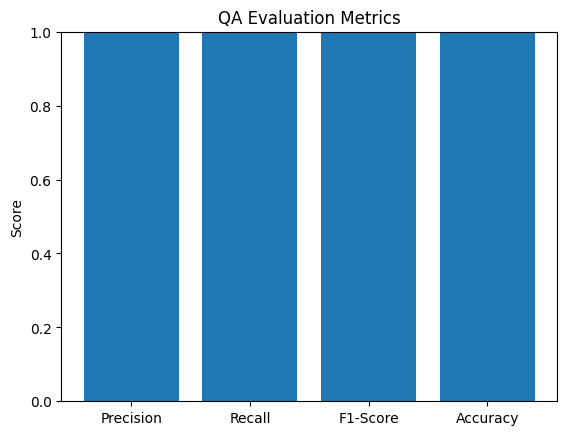

In [ ]:
# Visualize Results in collab just [OPTIONAL]
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('QA Evaluation Metrics')
plt.ylabel('Score')
plt.show()


In [12]:
#Error logging Extension

import pandas as pd
import os
from datetime import datetime

# Paths
qa_log_path = '/content/drive/MyDrive/AI_QA_Logs/qa_log.csv'
error_log_path = '/content/drive/MyDrive/AI_QA_Logs/qa_errors.csv'

# Read main QA log
qa_df = pd.read_csv(qa_log_path)

# Filter failed prompts
failed_df = qa_df[qa_df['category'].str.lower() == 'fail']

# Add run timestamp for clarity
failed_df['error_logged_at'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Create or append to the error log file
if os.path.exists(error_log_path):
    prev_errors = pd.read_csv(error_log_path)
    all_errors = pd.concat([prev_errors, failed_df], ignore_index=True)
    all_errors.to_csv(error_log_path, index=False)
else:
    failed_df.to_csv(error_log_path, index=False)

print(f"❌ {len(failed_df)} failed prompts logged into '{error_log_path}'")
print("✅ Error log updated successfully.")


/tmp/ipython-input-3361660293.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_df['error_logged_at'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")


❌ 63 failed prompts logged into '/content/drive/MyDrive/AI_QA_Logs/qa_errors.csv'
✅ Error log updated successfully.


In [13]:
#Downloading error extensions [MANDATORY]

# Assign today's failures to error_log_df
error_log_df = fails   # 'fails' comes from your QA master notebook

# Save to CSV and download
error_log_df.to_csv('error_log_report.csv', index=False)

from google.colab import files
files.download('error_log_report.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import sqlite3
import pandas as pd
import datetime

# Connect to database (creates file if not exists)
db_path = '/content/drive/MyDrive/AI_QA_Logs/qa_logs.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create table for daily logs if not exists
cursor.execute('''
CREATE TABLE IF NOT EXISTS qa_runs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    prompt TEXT,
    response TEXT,
    reference TEXT,
    category TEXT,
    timestamp TEXT
)
''')
conn.commit()
print("✅ Database ready at:", db_path)

✅ Database ready at: /content/drive/MyDrive/AI_QA_Logs/qa_logs.db


In [15]:
# Insert today's results into database
for _, row in df.iterrows():
    cursor.execute('''
    INSERT INTO qa_runs (prompt, response, reference, category, timestamp)
    VALUES (?, ?, ?, ?, ?)
    ''', (row['prompt'], row['response'], row['reference'], row['category'], row['timestamp']))
conn.commit()
print("📥 Today's QA results inserted into database.")

📥 Today's QA results inserted into database.


In [16]:
# Example 1: View all failed responses
fails_df = pd.read_sql_query("SELECT * FROM qa_runs WHERE category='Fail'", conn)
print("❌ All Failures:")
display(fails_df)

# Example 2: Count total passes and fails
summary_df = pd.read_sql_query('''
SELECT category, COUNT(*) AS count
FROM qa_runs
GROUP BY category
''', conn)
print("📊 QA Summary:")
display(summary_df)

# Example 3: See most recent entries
recent_df = pd.read_sql_query('SELECT * FROM qa_runs ORDER BY id DESC LIMIT 10', conn)
print("🕒 Recent entries:")
display(recent_df)

❌ All Failures:


id                               prompt         response reference  \
0   3                         What is 9+5?               12        14   
1   4                       what is 50-10?               30        40   
2   6  which singer sung the song Mayores?  Christina Perri   Becky G   
3  11                         What is 9+5?               12        14   
4  12                       what is 50-10?               30        40   
5  14  which singer sung the song Mayores?  Christina Perri   Becky G   
6  25   which is the fastest car in world?          Ferrari   Bugatti   

  category            timestamp  
0     Fail  2025-10-07 10:59:39  
1     Fail  2025-10-07 10:59:39  
2     Fail  2025-10-07 10:59:39  
3     Fail  2025-10-07 18:14:27  
4     Fail  2025-10-07 18:14:27  
5     Fail  2025-10-07 18:14:27  
6     Fail  2025-10-07 19:29:20

📊 QA Summary:


category  count
0     Fail      7
1     Pass     18

🕒 Recent entries:


id                               prompt     response    reference category  \
0  25   which is the fastest car in world?      Ferrari      Bugatti     Fail   
1  24     What is the latest apple laptop?           M4           M4     Pass   
2  23    who is founder of Nvidia company?  Jason Leung  Jason Leung     Pass   
3  22  which singer sung the song Mayores?      Becky G      Becky G     Pass   
4  21                   what roams at day?        Birds        Birds     Pass   
5  20                       what is 50-10?           40           40     Pass   
6  19                         What is 9+5?           14           14     Pass   
7  18                   Who wrote Macbeth?  Shakespeare  Shakespeare     Pass   
8  17        What's the capital of France?        Paris        Paris     Pass   
9  16     What is the latest apple laptop?           M4           M4     Pass   

             timestamp  
0  2025-10-07 19:29:20  
1  2025-10-07 19:29:20  
2  2025-10-07 19:29:20  
3  2025-10-07 19:29:20  
4  2025-10-07 19:29:20  
5  2025-10-07 19:29:20  
6  2025-10-07 19:29:20  
7  2025-10-07 19:29:20  
8  2025-10-07 19:29:20  
9  2025-10-07 18:14:27

In [17]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS metrics (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    precision REAL,
    recall REAL,
    f1 REAL,
    accuracy REAL
)
''')

cursor.execute('''
INSERT INTO metrics (date, precision, recall, f1, accuracy)
VALUES (?, ?, ?, ?, ?)
''', (
    datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    precision,
    recall,
    f1,
    accuracy
))
conn.commit()
print("📈 Metrics saved to database.")

📈 Metrics saved to database.


In [18]:
export_df = pd.read_sql_query("SELECT * FROM qa_runs", conn)
export_df.to_csv('/content/drive/MyDrive/AI_QA_Logs/qa_database_export.csv', index=False)
print("📤 Exported full database to CSV.")

📤 Exported full database to CSV.


In [ ]:
conn = sqlite3.connect('my_database.db') #[OPTIONAL]

In [ ]:
from google.colab import files      #[OPTIONAL]
files.download('my_database.db')